<a href="https://colab.research.google.com/github/Neelhmodi/CODSOFT_INTERNSHIP/blob/main/CODSOFT_TASK_1_TITANIC_SURVIVAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Necessary Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

Load Data and shows first 5 rows of data.

In [2]:
titanic_df = pd.read_csv('/content/Titanic_dataset.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Calculates the number of rows and columns

In [3]:
titanic_df.shape

(891, 12)

checking the datatype

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Calculates statistical values

In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Drop Unnecessary values

In [6]:
new_titanic_df = titanic_df.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1)
new_titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


checking the number of rows and column of new data

In [7]:
new_titanic_df.shape

(891, 8)

Mark null values as True and returns sum of number of True values in each column in new df

In [8]:
new_titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Calculates statistical values for new data

In [9]:
new_titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


data prepoccessing

In [10]:
scaler = StandardScaler()
new_titanic_df[['Age','Fare']] = scaler.fit_transform(new_titanic_df[['Age','Fare']])
new_titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,-0.530377,1,0,-0.502445,S
1,1,1,female,0.571831,1,0,0.786845,C
2,1,3,female,-0.254825,0,0,-0.488854,S
3,1,1,female,0.365167,1,0,0.420730,S
4,0,3,male,0.365167,0,0,-0.486337,S


Mark null values as True and returns sum of number of True values in each column

In [11]:
new_titanic_df['Age'].fillna(new_titanic_df['Age'].mean(), inplace=True)
new_titanic_df['Embarked'].fillna(new_titanic_df['Embarked'].mode()[0], inplace=True)
new_titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

categorical data converter into numaric data using OneHotEncoder


In [12]:
new_titanic_df.replace({'Sex':{'male':0,'female':1}}, inplace=True)
new_titanic_df.replace({'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
new_titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,-0.530377,1,0,-0.502445,0
1,1,1,1,0.571831,1,0,0.786845,1
2,1,3,1,-0.254825,0,0,-0.488854,0
3,1,1,1,0.365167,1,0,0.420730,0
4,0,3,0,0.365167,0,0,-0.486337,0


check imbalance data and set into balance data

In [14]:
new_titanic_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [19]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_train_rus, Y_train_rus = rus.fit_resample(new_titanic_df.drop(['Survived'],axis=1), new_titanic_df['Survived'])
print("After undersampling the shape of train_X: ", X_train_rus.shape)
print("After undersampling the shape of train_Y: ", Y_train_rus.shape)
print("After undersampling the value counts of target variable: ", Y_train_rus.value_counts())


After undersampling the shape of train_X:  (684, 7)
After undersampling the shape of train_Y:  (684,)
After undersampling the value counts of target variable:  Survived
0    342
1    342
Name: count, dtype: int64


Data Visualization

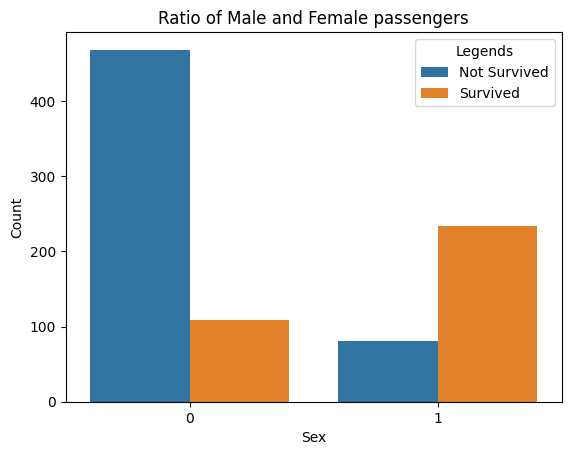

In [20]:
sns.countplot(x='Sex',data=new_titanic_df,hue='Survived')
plt.legend(title = "Legends", labels = ["Not Survived", "Survived"])
plt.title("Ratio of Male and Female passengers")
plt.ylabel("Count")
plt.xlabel("Sex")
plt.show()

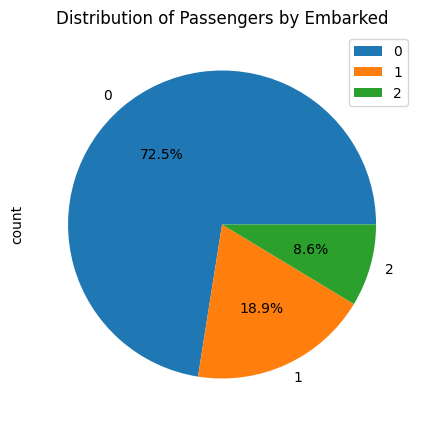

In [21]:
new_titanic_df['Embarked'].value_counts().plot(kind='pie',figsize=(6,5),autopct='%1.1f%%')
plt.title("Distribution of Passengers by Embarked")
plt.legend({'0','1','2'})
plt.show()

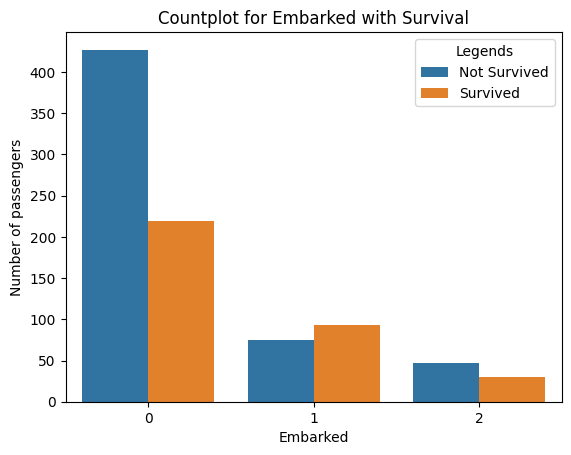

In [22]:
sns.countplot(data = new_titanic_df, x = "Embarked", hue = "Survived")
plt.title("Countplot for Embarked with Survival")
plt.xlabel("Embarked")
plt.ylabel("Number of passengers")
plt.legend(title = "Legends", labels = ["Not Survived", "Survived"])
plt.show()


Text(0, 0.5, 'Number of passengers')

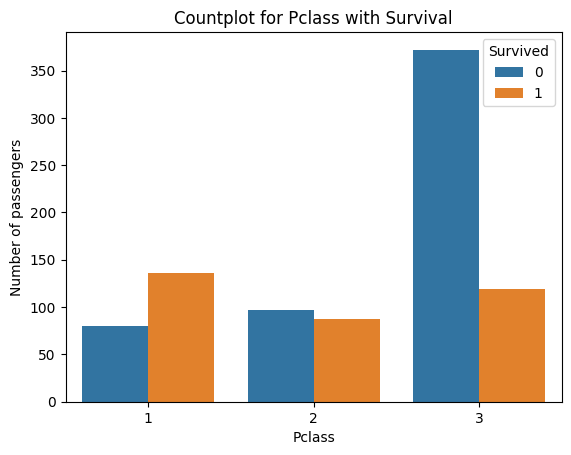

In [23]:
sns.countplot(data = new_titanic_df, x = "Pclass", hue = "Survived")
plt.title("Countplot for Pclass with Survival")
plt.xlabel("Pclass")
plt.ylabel("Number of passengers")

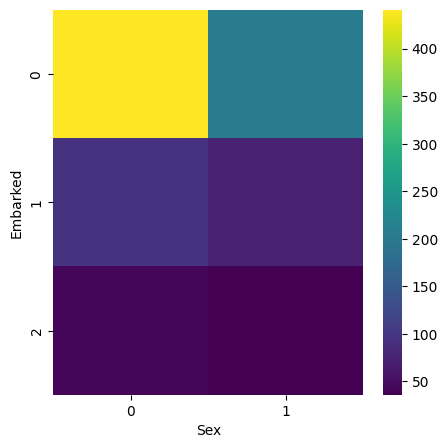

In [24]:
plt.subplots(figsize=(5, 5))
df_2dhist = pd.DataFrame({
    x_label: grp['Embarked'].value_counts()
    for x_label, grp in new_titanic_df.groupby('Sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sex')
plt.ylabel('Embarked')
plt.show()

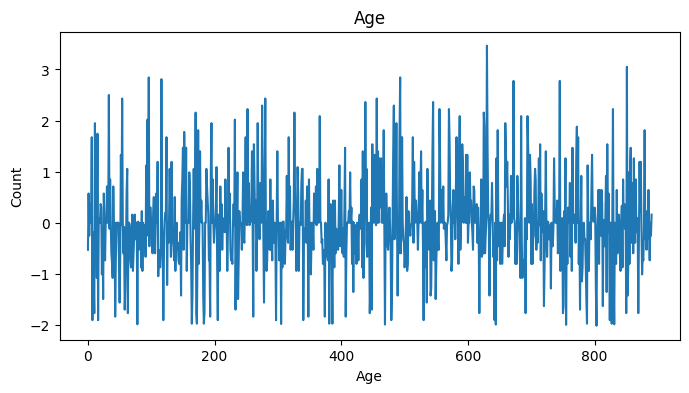

In [25]:
new_titanic_df['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

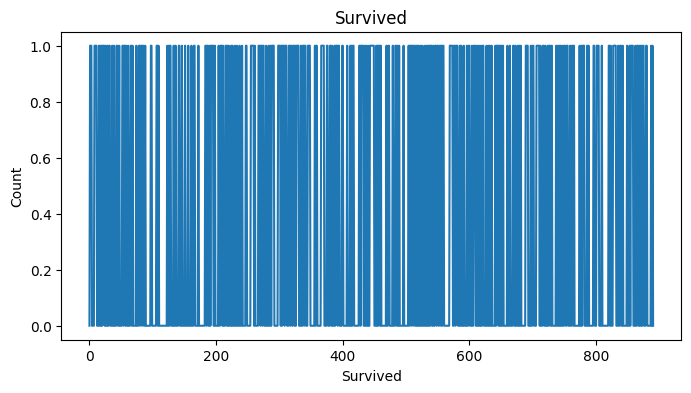

In [26]:
new_titanic_df['Survived'].plot(kind='line', figsize=(8, 4), title='Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

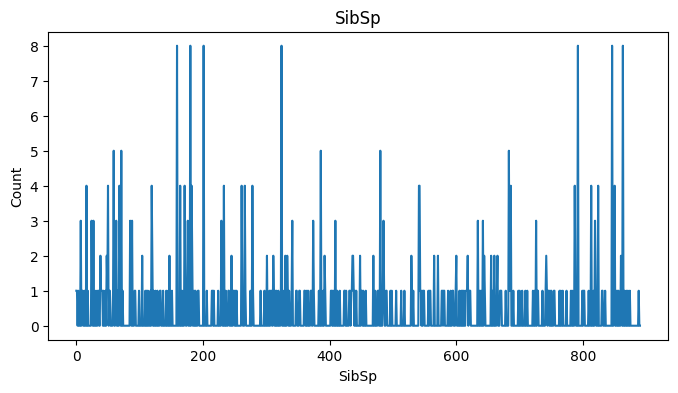

In [27]:
new_titanic_df['SibSp'].plot(kind='line', figsize=(8, 4), title='SibSp')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.show()

Deviding the data into Dependent and Independent variables.

In [29]:
x= new_titanic_df.drop(columns=['Survived'],axis=1)
y= new_titanic_df['Survived']

In [30]:
print(x)

     Pclass  Sex           Age  SibSp  Parch      Fare  Embarked
0         3    0 -5.303766e-01      1      0 -0.502445         0
1         1    1  5.718310e-01      1      0  0.786845         1
2         3    1 -2.548247e-01      0      0 -0.488854         0
3         1    1  3.651671e-01      1      0  0.420730         0
4         3    0  3.651671e-01      0      0 -0.486337         0
..      ...  ...           ...    ...    ...       ...       ...
886       2    0 -1.859368e-01      0      0 -0.386671         0
887       1    1 -7.370406e-01      0      0 -0.044381         0
888       3    1  2.388379e-16      1      2 -0.176263         0
889       1    0 -2.548247e-01      0      0 -0.044381         1
890       3    0  1.585031e-01      0      0 -0.492378         2

[891 rows x 7 columns]


In [31]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Deviding the cleaned data into training and testing sets and checking the null value in train and test data

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.isnull().sum()
x_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

checking the data are Either linearly separated nor non-linearly separated

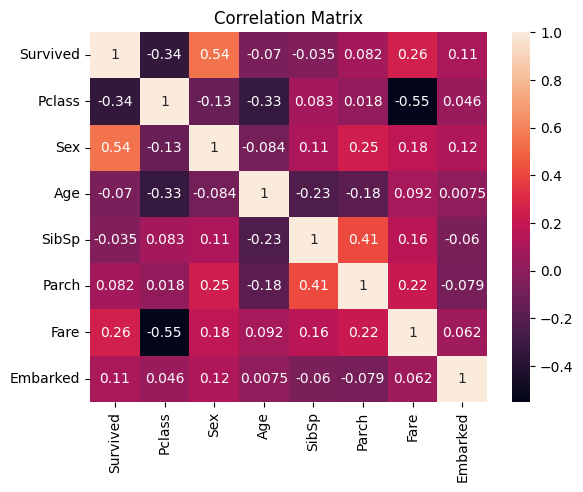

In [33]:
sns.heatmap(new_titanic_df.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

create first ML model using LogisticReggrestion and train the model

In [34]:
from sklearn.linear_model import LogisticRegression
df_logistic={
    'C':[i for i in range(1,10)]
}
grid_search = GridSearchCV(LogisticRegression(),df_logistic)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
model = LogisticRegression(C=1)
model.fit(x_train,y_train)

{'C': 1}


LogisticRegression(C=1)

predict the logisticregression model

In [35]:
prediction = model.predict(x_test)
print(prediction)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


Display the accuracy score , precision score , recall score , f1 score and confusion matrix

LogisticRegression accuracy score is :  79.89
LogisticRegression precision score is :  77.14
LogisticRegression recall score is :  72.97
LogisticRegression f1 score is :  75.0
confusion matarix : 


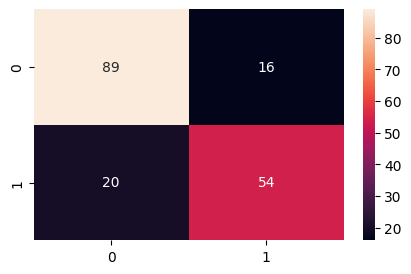

In [36]:
print("LogisticRegression accuracy score is : ",round(accuracy_score(y_test,prediction),4)*100)
print("LogisticRegression precision score is : ",round(precision_score(y_test,prediction),4)*100)
print("LogisticRegression recall score is : ",round(recall_score(y_test,prediction),4)*100)
print("LogisticRegression f1 score is : ",round(f1_score(y_test,prediction),4)*100)
print("confusion matarix : ")
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,prediction),annot=True)
plt.show()

create Second ML model using DecisionTreeClassifier and Train the model

In [37]:
from sklearn.tree import DecisionTreeClassifier
df_tree={
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[i for i in range(2,20)]
}
grid_search = GridSearchCV(DecisionTreeClassifier(),df_tree)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
model_DecisionTree = DecisionTreeClassifier(criterion='gini',max_depth=5,splitter='random')
model_DecisionTree.fit(x_train,y_train)

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}


DecisionTreeClassifier(max_depth=6, splitter='random')

predict the DecisionTree model

In [38]:
prediction_DecisionTree = model_DecisionTree.predict(x_test)
print(prediction_DecisionTree)

[0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0]


Display the accuracy score , precision score , recall score , f1 score and confusion matrix

DecisionTreeClassifier Accuracy score is :  80.45
DecisionTreeClassifier precision score is :  84.21
DecisionTreeClassifier recall score is :  64.86
DecisionTreeClassifier f1 score is :  73.28
confusion matarix : 


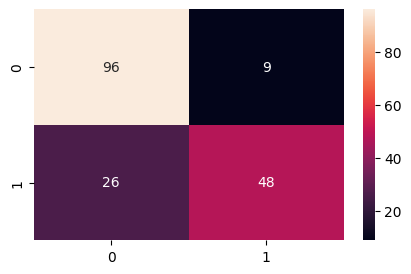

In [39]:
print("DecisionTreeClassifier Accuracy score is : ",round(accuracy_score(y_test,prediction_DecisionTree),4)*100)
print("DecisionTreeClassifier precision score is : ",round(precision_score(y_test,prediction_DecisionTree),4)*100)
print("DecisionTreeClassifier recall score is : ",round(recall_score(y_test,prediction_DecisionTree),4)*100)
print("DecisionTreeClassifier f1 score is : ",round(f1_score(y_test,prediction_DecisionTree),4)*100)
print("confusion matarix : ")
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,prediction_DecisionTree),annot=True)
plt.show()

create Third ML model using RandomForestClassifier and Train the model

In [40]:
from sklearn.ensemble import RandomForestClassifier

df_random={
    'n_estimators':[i for i in range(10,100,10)],
    'criterion':['gini','entropy'],
    'max_depth':[i for i in range(2,20)]
}
grid_search = GridSearchCV(RandomForestClassifier(),df_random)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)

model_RandomForest = RandomForestClassifier(criterion='gini',max_depth=4,n_estimators=40)
model_RandomForest.fit(x_train,y_train)

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 40}


RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=50)

predict the Randomforest model

In [41]:
prediction_RandomForest = model_RandomForest.predict(x_test)
print(prediction_RandomForest)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]


Display the accuracy score , precision score , recall score , f1 score and confusion matrix

RandomForestClassifier Accuracy score is :  81.01
RandomForestClassifier precision score is :  82.26
RandomForestClassifier recall score is :  68.92
RandomForestClassifier f1 score is :  75.0
confusion matarix : 


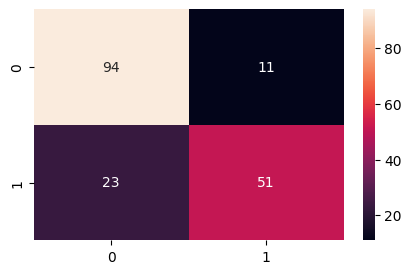

In [42]:
print("RandomForestClassifier Accuracy score is : ",round(accuracy_score(y_test,prediction_RandomForest),4)*100)
print("RandomForestClassifier precision score is : ",round(precision_score(y_test,prediction_RandomForest),4)*100)
print("RandomForestClassifier recall score is : ",round(recall_score(y_test,prediction_RandomForest),4)*100)
print("RandomForestClassifier f1 score is : ",round(f1_score(y_test,prediction_RandomForest),4)*100)
print("confusion matarix : ")
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,prediction_RandomForest),annot=True)
plt.show()

create four ML model using KNeighborsClassifier and Train the model

In [43]:
from sklearn.neighbors import KNeighborsClassifier
df_knn={
    'n_neighbors':[i for i in range(1,10)],
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute']
}
grid_search = GridSearchCV(KNeighborsClassifier(),df_knn)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
ks= KNeighborsClassifier(algorithm='auto',n_neighbors=3,weights='uniform')
ks.fit(x_train,y_train)

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}


KNeighborsClassifier(n_neighbors=3)

predict the knn model

In [44]:
prediction_KNN = ks.predict(x_test)
print(prediction_KNN)

[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1
 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1]


Display the accuracy score , precision score , recall score , f1 score and confusion matrix

KNeighborsClassifier Accuracy score is :  83.24000000000001
KNeighborsClassifier precision score is :  81.43
KNeighborsClassifier recall score is :  77.03
KNeighborsClassifier f1 score is :  79.17
confusion matarix : 


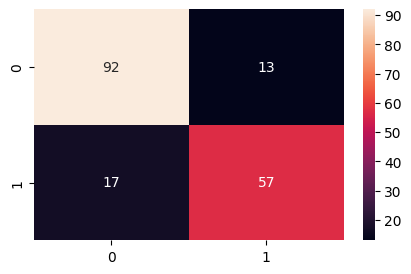

In [45]:
print("KNeighborsClassifier Accuracy score is : ",round(accuracy_score(y_test,prediction_KNN),4)*100)
print("KNeighborsClassifier precision score is : ",round(precision_score(y_test,prediction_KNN),4)*100)
print("KNeighborsClassifier recall score is : ",round(recall_score(y_test,prediction_KNN),4)*100)
print("KNeighborsClassifier f1 score is : ",round(f1_score(y_test,prediction_KNN),4)*100)
print("confusion matarix : ")
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,prediction_KNN),annot=True)
plt.show()

create four ML model using svc and Train the model

In [46]:
from sklearn.svm import SVC
df_svc={
    'kernel':['linear','poly','rbf','sigmoid'],
    'C':[i for i in range(1,10)],
    'gamma':['scale','auto']
}
grid_search = GridSearchCV(SVC(),df_svc)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
SVC_model = SVC(C=6,gamma='auto',kernel='rbf')
SVC_model.fit(x_train,y_train)

{'C': 6, 'gamma': 'auto', 'kernel': 'rbf'}


SVC(C=6, gamma='auto')

predict the svc model

In [47]:
prediction_SVC = SVC_model.predict(x_test)
print(prediction_SVC)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]


Display the accuracy score , precision score , recall score , f1 score and confusion matrix

SVC Accuracy score is :  80.45
SVC precision score is :  80.95
SVC recall score is :  68.92
SVC f1 score is :  74.45
confusion matarix : 


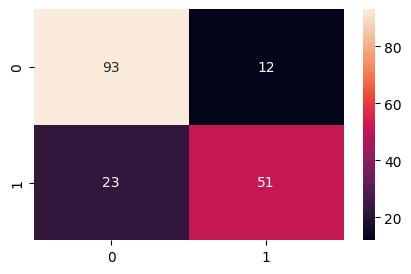

In [48]:
print("SVC Accuracy score is : ",round(accuracy_score(y_test,prediction_SVC),4)*100)
print("SVC precision score is : ",round(precision_score(y_test,prediction_SVC),4)*100)
print("SVC recall score is : ",round(recall_score(y_test,prediction_SVC),4)*100)
print("SVC f1 score is : ",round(f1_score(y_test,prediction_SVC),4)*100)
print("confusion matarix : ")
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,prediction_SVC),annot=True)
plt.show()

create five ML model using votingclassifier and train the model

In [49]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[('lr',model),('dt',model_DecisionTree),('rf',model_RandomForest),('knn',ks),('svc',SVC_model)],voting='hard')
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=6,
                                                     splitter='random')),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=6,
                                                     n_estimators=50)),
                             ('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('svc', SVC(C=6, gamma='auto'))])

predict the votingclassifier model

In [50]:
prediction_vc = vc.predict(x_test)
print(prediction_vc)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]


Display the accuracy score , precision score , recall score , f1 score and confusion matrix

VotingClassifier Accuracy score is :  81.01
VotingClassifier precision score is :  81.25
VotingClassifier recall score is :  70.27
VotingClassifier f1 score is :  75.36
confusion matarix : 


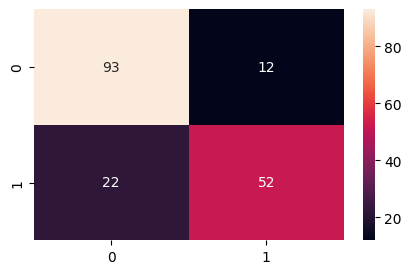

In [51]:
print("VotingClassifier Accuracy score is : ",round(accuracy_score(y_test,prediction_vc),4)*100)
print("VotingClassifier precision score is : ",round(precision_score(y_test,prediction_vc),4)*100)
print("VotingClassifier recall score is : ",round(recall_score(y_test,prediction_vc),4)*100)
print("VotingClassifier f1 score is : ",round(f1_score(y_test,prediction_vc),4)*100)
print("confusion matarix : ")
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,prediction_vc),annot=True)
plt.show()

Find best confusion matrix and accuracy score

Best Confusion Matrix:


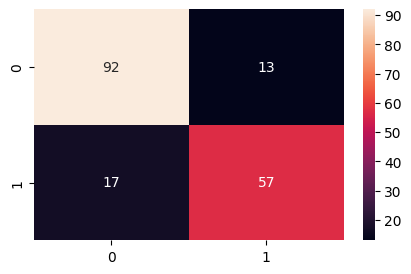


Best Accuracy Score: 83.24000000000001

Best Precision Score: 81.43
Best Recall Score: 77.03
Best F1 Score: 79.17


In [52]:
# Create a list to store the accuracy scores
accuracy_scores = [round(accuracy_score(y_test,prediction),4)*100, round(accuracy_score(y_test,prediction_KNN),4)*100, round(accuracy_score(y_test,prediction_SVC),4)*100, round(accuracy_score(y_test,prediction_RandomForest),4)*100, round(accuracy_score(y_test,prediction_vc),4)*100]

# Create a list to store the confusion matrices
confusion_matrices = [confusion_matrix(y_test,prediction), confusion_matrix(y_test,prediction_KNN), confusion_matrix(y_test,prediction_SVC), confusion_matrix(y_test,prediction_RandomForest), confusion_matrix(y_test,prediction_vc)]

# Find the index of the highest accuracy score
best_accuracy_index = accuracy_scores.index(max(accuracy_scores))

# Get the best confusion matrix
best_confusion_matrix = confusion_matrices[best_accuracy_index]

# Print the best confusion matrix and accuracy score
print("Best Confusion Matrix:")
plt.figure(figsize=(5,3))
sns.heatmap(best_confusion_matrix, annot=True, fmt="d")
plt.show()
print("")
print("Best Accuracy Score:", max(accuracy_scores))
print("")
# Calculate precision, recall, and f1 score for each model
precision_scores = [precision_score(y_test, prediction), precision_score(y_test, prediction_KNN), precision_score(y_test, prediction_SVC), precision_score(y_test, prediction_RandomForest), precision_score(y_test, prediction_vc)]
recall_scores = [recall_score(y_test, prediction), recall_score(y_test, prediction_KNN), recall_score(y_test, prediction_SVC), recall_score(y_test, prediction_RandomForest), recall_score(y_test, prediction_vc)]
f1_scores = [f1_score(y_test, prediction), f1_score(y_test, prediction_KNN), f1_score(y_test, prediction_SVC), f1_score(y_test, prediction_RandomForest), f1_score(y_test, prediction_vc)]

# Find the index of the highest f1 score
best_f1_index = f1_scores.index(max(f1_scores))

# Print the best precision, recall, and f1 score
print("Best Precision Score:", round(precision_scores[best_f1_index],4)*100)
print("Best Recall Score:", round(recall_scores[best_f1_index],4)*100)
print("Best F1 Score:", round(f1_scores[best_f1_index],4)*100)
